In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
from sklearn.decomposition import PCA
import plotly.express as px
import numpy as np

In [2]:
data = pd.read_pickle("data/data_w_feature_eng.pkl").dropna()

In [3]:
print(data.dtypes)

comment                                       object
parent_comment                                object
label                                          int64
comment_tokens                                object
parent_comment_tokens                         object
comment_tokens_bigram                         object
parent_comment_tokens_bigram                  object
comment_tokens_trigram                        object
parent_comment_tokens_trigram                 object
comment_score                                float64
parent_comment_score                         float64
weighted_parent_sentiment_score_neutral         bool
weighted_parent_sentiment_score_positive        bool
weighted_comment_sentiment_score_neutral        bool
weighted_comment_sentiment_score_positive       bool
comment_word_count                             int64
parent_comment_word_count                      int64
comment_token_count                            int64
parent_comment_token_count                    

### Checks for Linear Separability

In [4]:
list_of_features = ['label','comment_score', 'parent_comment_score',
       'comment_word_count','parent_comment_word_count',
       'comment_token_count', 'parent_comment_token_count',
       'comment_unique_word_count', 'parent_comment_unique_word_count',
       'comment_unique_token_count', 'parent_comment_unique_token_count',
       'comment_stopword_count', 'parent_comment_stopword_count',
       'comment_mean_word_length', 'parent_comment_mean_word_length',
       'comment_mean_token_length', 'parent_comment_mean_token_length',
       'comment_char_count', 'parent_comment_char_count',
       'comment_punctuation_count', 'parent_comment_punctuation_count',
       'comment_hashtag_count', 'parent_comment_hashtag_count',
       'comment_number_count', 'parent_comment_number_count',
       'weighted_parent_sentiment_score_neutral',
       'weighted_parent_sentiment_score_positive',
       'weighted_comment_sentiment_score_neutral',
       'weighted_comment_sentiment_score_positive']
df = data[list_of_features]

/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


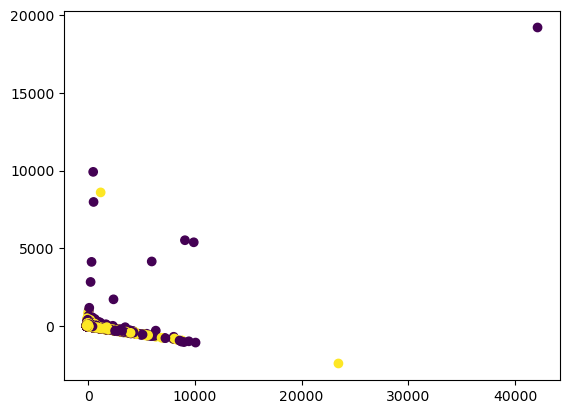

In [5]:
pca = PCA(n_components=15)
reduced_features = pca.fit_transform(df)
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=df['label'])
plt.show()

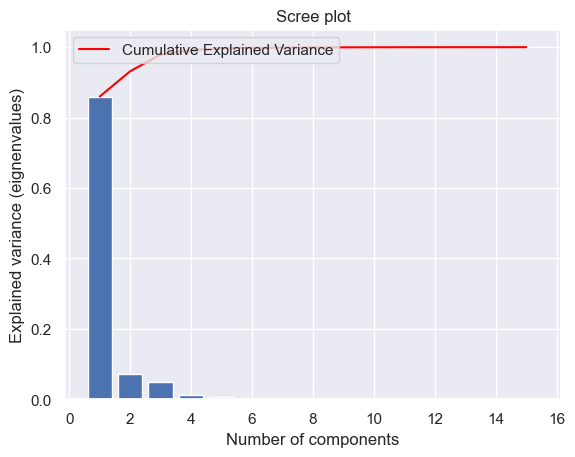

In [8]:
sns.set()
# Bar plot of explained_variance
plt.bar(
    range(1,len(pca.explained_variance_ratio_)+1),
    pca.explained_variance_ratio_
    )

plt.plot(
    range(1,len(pca.explained_variance_ratio_ )+1),
    np.cumsum(pca.explained_variance_ratio_),
    c='red',
    label='Cumulative Explained Variance')

plt.legend(loc='upper left')
plt.xlabel('Number of components')
plt.ylabel('Explained variance (eignenvalues)')
plt.title('Scree plot')

plt.show()

In [9]:
total_var = pca.explained_variance_ratio_[0:3].sum()
fig = px.scatter_3d(
    [row[0:3] for row in reduced_features], x=0, y=1, z=2, color=df['label'].astype('category'),
    title=f'Total Explained Variance: {total_var:.2f}%',
    labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'}
)

fig.show()

/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/plotly/express/_core.py:1958: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby(required_grouper, sort=False)  # skip one_group groupers


In [ ]:
loadings_pca1 = np.absolute(pca.components_[0])
index = np.argsort(np.absolute(loadings_pca1))
values = np.sort(np.absolute(loadings_pca1))
print("Loadings of PCA:", loadings_pca1)

In [ ]:
fig = plt.figure(figsize = [12, 6])
plt.barh(
    range(1,len(list_of_features) + 1),
    values,
    tick_label = [list_of_features[ind] for ind in index ]
    )
plt.show()

### Checks for Dataset Balance

Total Number of Entries before reduction: 202023
Distribution of Labels
label
1    101058
0    100965
Name: count, dtype: int64


/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


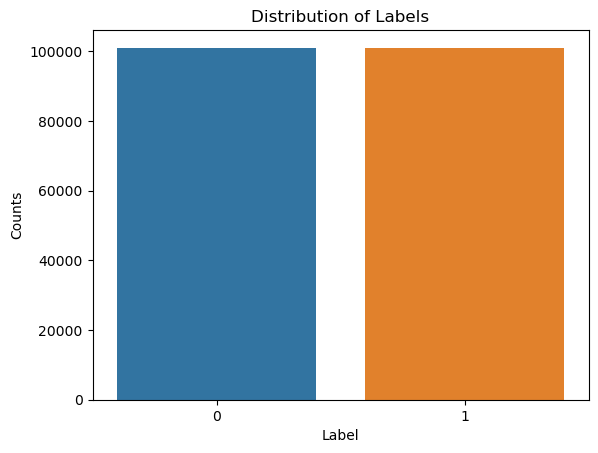

In [3]:
sns.countplot(data, x = "label")
plt.title("Distribution of Labels")
plt.xlabel("Label")
plt.ylabel("Counts")

print("Total Number of Entries before reduction:",len(data))
print("Distribution of Labels")
print(data["label"].value_counts())


Dataset is balanced, no balancing action required

### Checks for Dimensionality

In [4]:
data_features = data.drop(['comment','parent_comment','label','comment_tokens','parent_comment_tokens'],axis=1)

In [5]:
data_features_without_bow_tdidf = data_features.drop(['comment_bow','parent_comment_bow','comment_tdidf','parent_comment_tdidf', 'comment_tdidf_nn'],axis = 1)

In [6]:
data_features_without_bow_tdidf

,comment_tokens_bigram,parent_comment_tokens_bigram,comment_tokens_trigram,parent_comment_tokens_trigram,comment_score,parent_comment_score,weighted_parent_sentiment_score_neutral,weighted_parent_sentiment_score_positive,weighted_comment_sentiment_score_neutral,weighted_comment_sentiment_score_positive,...,comment_mean_token_length,parent_comment_mean_token_length,comment_char_count,parent_comment_char_count,comment_punctuation_count,parent_comment_punctuation_count,comment_hashtag_count,parent_comment_hashtag_count,comment_number_count,parent_comment_number_count
0,"[just shoot, shoot some, some unarmed, unarmed...","[a pregnant, pregnant police, police officer, ...","[just shoot some, shoot some unarmed, some una...","[a pregnant police, pregnant police officer, p...",-0.3818,-0.0523,True,False,False,False,...,4.125000,4.583333,53,193,1,5,0,0,0,0
1,"[is like, like saying, saying the, the relativ...","[well ,, , no, no ,, , it, is better, better ....","[that is like, is like saying, like saying the...","[well , no, , no ,, no , it, , it is, it is be...",-0.8126,-0.5709,False,False,False,False,...,6.125000,4.162162,143,259,2,9,0,0,0,0
2,"[except pluto, pluto would, would not, not giv...","[we would, would live, live out, out destiny, ...","[except pluto would, pluto would not, would no...","[we would live, would live out, live out desti...",0.3182,0.0000,True,False,False,True,...,4.222222,5.125000,51,61,0,1,0,0,0,0
3,"[are probably, probably right, right ,, , it, ...","[i really, really do, do not, not think, think...","[you are probably, are probably right, probabl...","[i really do, really do not, do not think, not...",0.4643,-0.7848,False,False,False,True,...,3.416667,4.473684,151,484,12,15,0,0,0,0
4,"[that 85, 85 hour, hour working, working abroa...","[am talkin, talkin bout, bout that, that veter...","[or that 85, that 85 hour, 85 hour working, ho...","[i am talkin, am talkin bout, talkin bout that...",-0.6428,-0.2023,True,False,False,False,...,4.272727,5.428571,84,114,2,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202018,"[my leg, leg are, are dangling, dangling off, ...","[bullet by, by hollywood, hollywood undead, un...","[my leg are, leg are dangling, are dangling of...","[bullet by hollywood, by hollywood undead, hol...",0.0000,0.0000,True,False,True,False,...,4.000000,5.500000,34,27,1,1,0,0,0,0
202019,"[chassis straightening, straightening maybe, m...","[diy chassis, chassis removal, removal ?]","[chassis straightening maybe, straightening ma...","[diy chassis removal, chassis removal ?]",0.0000,0.0000,True,False,True,False,...,6.500000,4.500000,28,20,1,1,0,0,0,0
202020,"[your blood, blood boiling, boiling because, a...","[this make, make my, my blood, blood boil, boi...","[is your blood, your blood boiling, blood boil...","[this make my, make my blood, my blood boil, b...",-0.7096,0.0000,True,False,False,False,...,4.750000,3.500000,47,25,1,1,0,0,0,0
202021,"[what man, man ..., ... you, do not, not like,...","[caster saying, saying pinch, pinch but, but n...","[what man ..., man ... you, ... you do, you do...","[caster saying pinch, saying pinch but, pinch ...",-0.2755,0.0000,True,False,False,False,...,3.900000,5.625000,81,56,6,1,0,0,0,0


In [7]:
print("Number of generic features:",data_features_without_bow_tdidf.shape[1])

Number of generic features: 32


In [8]:
print("Number of dimensions for bow:",data['comment_bow'][0].shape[1])# fyi: after adding bigrams and trigrams- 17805 to 43861
print("Number of dimensions for parent bow:",data['parent_comment_bow'][0].shape[1])#27187 to 102867
print("Number of dimensions for tdidf:",data['comment_tdidf'][0].shape[1])
print("Number of dimensions for parent tdidf:",data['parent_comment_tdidf'][0].shape[1])


Number of dimensions for bow: 43894
Number of dimensions for parent bow: 102930
Number of dimensions for tdidf: 43894
Number of dimensions for parent tdidf: 102930


Dimensions for BoW and Tdidf too high, will need to run RFE before training each model

### Train-Test Split for Machine Learning
80-20 Train-Test split

In [9]:
X = data.drop('label', axis = 1)
y = data['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = 42)
train = pd.concat([X_train,y_train], axis = 1)
test = pd.concat([X_test,y_test], axis = 1)
train.to_pickle("data/train.pkl")
test.to_pickle("data/test.pkl")

/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/samsepiol/opt/anaconda3/envs/cs3244/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
